# 비지도 이상탐지 모델
## (Isolation Forest & One-Class SVM)

데이터 셋

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs

# 1. 정상 데이터 생성 (2D 블롭)
X_normal, _ = make_blobs(n_samples=200, centers=1, cluster_std=0.6, random_state=42)
# 2. 이상 데이터 생성 (퍼진 블롭)
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
# 3. 결합
X = np.concatenate([X_normal, X_outliers], axis=0)
y_true = np.concatenate([np.ones(200), -1*np.ones(20)])  # 실제 라벨 (1=정상, -1=이상)



Isolation Forest

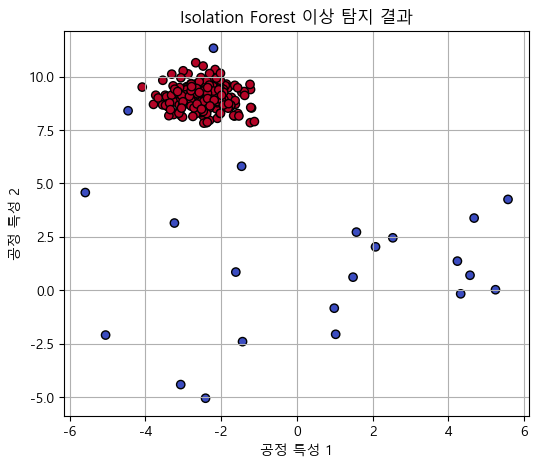

In [6]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # IsolationForest 모델 만들기
# contamination=0.1: 전체의 10%를 이상으로 간주
# random_state=42: 랜덤하게 만들지만, 42로 정해두면 매번 똑같이 만듦
y_pred_iso = iso_forest.fit_predict(X)  # fit_predict: X로 공부하고, 각 점이 정상(1)인지 이상(-1)인지 예측

# 1. 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 한글이 잘 보이게 설정
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # 맥OS에서 한글이 잘 보이게 설정(주석처리)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 기호가 깨지지 않게 설정

# 시각화(그래프로 보기 좋게 그림)
plt.figure(figsize=(6,5))  # 그림 크기 정하기 (가로 6, 세로 5)
plt.title("Isolation Forest 이상 탐지 결과")  # 그래프 제목
plt.scatter(X[:,0], X[:,1], c=y_pred_iso, cmap='coolwarm', edgecolors='k')  # 점을 찍는데, 예측 결과(정상/이상)에 따라 색을 다르게 함
plt.xlabel("공정 특성 1")  # x축 이름
plt.ylabel("공정 특성 2")  # y축 이름
plt.grid(True)  # 격자(눈금) 표시
plt.show()  # 그래프 화면에 보여주기

One-Class SVM

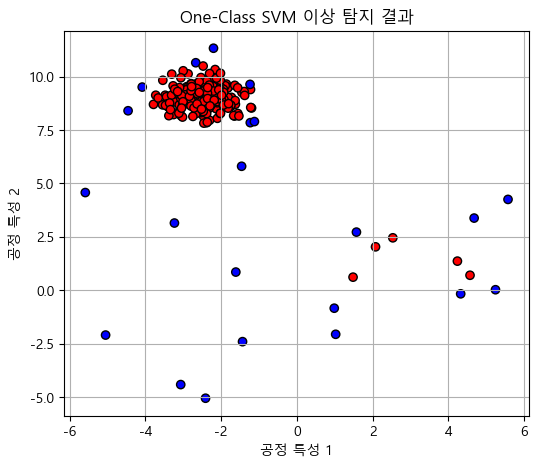

In [7]:
oc_svm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)  # OneClassSVM: 한 종류만 있을 때 이상을 찾는 모델 만들기
# kernel='rbf': 곡선 경계 사용
# gamma=0.1: 곡선의 모양(숫자가 작으면 부드럽고, 크면 뾰족)
# nu=0.1: 전체의 10%를 이상으로 간주

y_pred_svm = oc_svm.fit_predict(X)  # fit_predict: X로 공부하고, 각 점이 정상(1)인지 이상(-1)인지 예측

plt.figure(figsize=(6,5))  # 그림 크기 정하기 (가로 6, 세로 5)
plt.title("One-Class SVM 이상 탐지 결과")  # 그래프 제목
plt.scatter(X[:,0], X[:,1], c=y_pred_svm, cmap='bwr', edgecolors='k')  # 점을 찍는데, 예측 결과(정상/이상)에 따라 색을 다르게 함
plt.xlabel("공정 특성 1")  # x축 이름
plt.ylabel("공정 특성 2")  # y축 이름
plt.grid(True)  # 격자(눈금) 표시
plt.show()  # 그래프 화면에 보여주기